<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [87]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [88]:
image = np.array(Image.open('./Images/lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





Shape of the original image: (100, 100, 3)
Shape of img_single_channel: (100, 100)


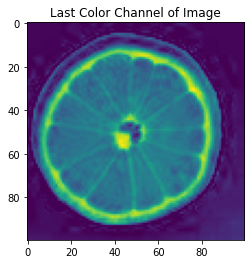

In [89]:
# Part 1

# Assume 'image' is a NumPy array of shape (height, width, 3)
# Print the shape of the original image
print(f"Shape of the original image: {image.shape}")

# Create a new variable 'img_single_channel' to store the last color channel
img_single_channel = image[:, :, 2]

# Print the shape of 'img_single_channel'
print(f"Shape of img_single_channel: {img_single_channel.shape}")

# Use plt.imshow to plot 'img_single_channel'
plt.imshow(img_single_channel)
plt.title('Last Color Channel of Image')
plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

Shape of img_average_channel: (100, 100)


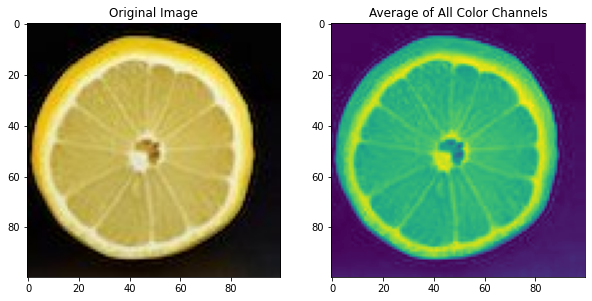

In [90]:
# Part 2

# Create a new variable 'img_average_channel' to store the average of all color channels
img_average_channel = np.mean(image, axis=2)

# Print the shape of 'img_average_channel'
print(f"Shape of img_average_channel: {img_average_channel.shape}")

# Use plt.imshow to plot the original image and 'img_average_channel'
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(img_average_channel)
plt.title('Average of All Color Channels')

plt.show()


## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

### What is an Identity Matrix?

An identity matrix is a square matrix where all the diagonal elements are 1, and all the other elements are 0. Imagine a tic-tac-toe board where the diagonal from the top-left to the bottom-right is filled with ones, and all other squares are zeros. That's a 3x3 identity matrix.

### What Does Multiplying with an Identity Matrix Do?

When you multiply any matrix by an identity matrix, the result is the original matrix itself. It's like multiplying any number by 1; the number stays the same.

#### Example:

Let's say you have a matrix \( A \):

$$
A = \begin{pmatrix}
5 & 7 \\
8 & 6 \\
4 & 10
\end{pmatrix}
$$

The 3x3 identity matrix \( I \) is:

$$
I = \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
$$

When you multiply \( A \) by \( I \), you get \( A \) back:

$$
A \times I = A
$$

This is because each row in \( A \) is effectively "scaled" by 1 and "shifted" by 0, leaving it unchanged.


In [91]:
# Import the random library to generate random numbers
import random

# Create an identity matrix with the same number of rows as 'img_average_channel'
# Note: This assumes that 'img_average_channel' is a square matrix.
identity_matrix = np.identity(img_average_channel.shape[0])

# Generate a random row index within the range of the identity matrix's row count
# We use random.randint to pick a random integer between 0 and the last row index
random_row_index = random.randint(0, identity_matrix.shape[0] - 1)

# Print the random row from the identity matrix
# This will display a row where all elements are 0 except for a single '1' at the diagonal position
print(f"Random row from identity_matrix: \n {identity_matrix[random_row_index]}")

Random row from identity_matrix: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [92]:
# Create a numpy array containing the row indices
N = img_average_channel.shape[0]  # Number of rows in the image
row_indices = np.arange(N)

# Shuffle the row indices
np.random.shuffle(row_indices)
rows = row_indices  # Renaming for clarity

# Print the shuffled row indices
print(f"Shuffled row indices: {rows}")



Shuffled row indices: [98 72 70 30 86 28 92 90 11 65 73 59 89 19 76 47 49 68 20 42 67  9 24 77
 26 34 88 46 44  8 64  1 40 96 85 41 39 74 57 21 12 31 29 94 53  7 54 84
 37 55 16 97 56 15 75 52  6 25 33 66 95 36 32 27 93 99  0 51 35  3 58 23
 81 71 48 13 87 60  2  4 38 50 78 63 18  5 17 79 10 80 22 62 14 91 69 43
 83 45 82 61]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


### Understanding Matrix \( T \)

Matrix \( T \) is essentially a shuffled version of the identity matrix. In an identity matrix, you have ones going down the diagonal and zeros everywhere else. When we shuffle the rows, what we're doing is rearranging those ones in the diagonal to different positions. Each row still has just one element that's a '1' and the rest are zeros, but now the '1's are scattered throughout the matrix based on our random shuffle.

#### Simple Analogy

In simpler terms, think of \( T \) as a rearranged playlist of your favorite songs. Each song (or row) is still there, but the order in which they play has been shuffled. The essence of the playlist remains, but the experience of listening to it will be different.


In [93]:
# Create matrix T by rearranging the rows of identity_matrix
T = identity_matrix[rows, :]

# Print the shape of T
print(f"Shape of T: {T.shape}")

# Optional: Reshape T if needed (shouldn't be necessary if everything is correct)
if T.shape != identity_matrix.shape:
    T = T.reshape(identity_matrix.shape)
    print(f"Reshaped T: {T.shape}")


Shape of T: (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

Shape of transformed_image: (100, 100)


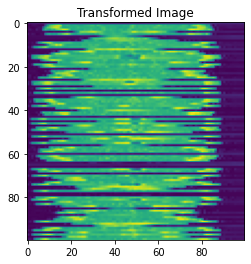

In [94]:
# Matrix multiply T and img_average_channel
transformed_image = np.dot(T, img_average_channel)

# Check the shape of the result
print(f"Shape of transformed_image: {transformed_image.shape}")

# Plot the transformed image
plt.imshow(transformed_image)
plt.title('Transformed Image')
plt.show()



When you look at the plot, you'll probably notice that the rows seem shuffled or scrambled. The overall structure of the image might be hard to recognize compared to the original img_average_channel.

#### Understanding the Transformation
Each dot product in the matrix multiplication is essentially picking one row from img_average_channel and placing it in a new position in transformed_image. So, what we're doing is shuffling the rows of the original image. It's like taking a book and rearranging its chapters. Each chapter still contains the same content, but the overall narrative is jumbled.

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

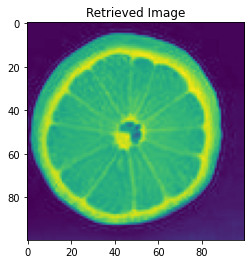

In [95]:
# Compute the inverse of T
Tinv = np.transpose(T)


# Perform the inverse operation
retrieved_image = np.dot(Tinv, transformed_image)

# Plot the retrieved image
plt.imshow(retrieved_image)
plt.title('Retrieved Image')
plt.show()



When you look at the plot, you should see that it matches the original img_average_channel. This confirms that the scrambling operation was successfully inverted, and we've managed to retrieve the original image.

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


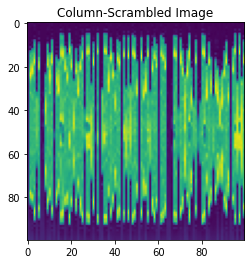

In [96]:
# Scramble the columns
transformed_image_columns = np.dot(img_average_channel, T.T)

# Plot the column-scrambled image
plt.imshow(transformed_image_columns)
plt.title('Column-Scrambled Image')
plt.show()


## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

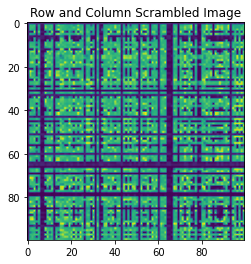

In [97]:
# Scramble both rows and columns
transformed_image_both = np.dot(np.dot(T, img_average_channel), T.T)

# Plot the fully scrambled image
plt.imshow(transformed_image_both)
plt.title('Row and Column Scrambled Image')
plt.show()


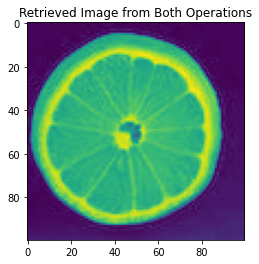

In [98]:
# Invert the operations to retrieve the original image
retrieved_image_both = np.dot(np.dot(Tinv, transformed_image_both), Tinv.T)

# Plot the retrieved image
plt.imshow(retrieved_image_both)
plt.title('Retrieved Image from Both Operations')
plt.show()


## References

1) https://numpy.org/doc/stable/user/basics.creation.html
2) https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots
3) Used ChatGPT for generating comments for my code